# Notes for Python for Data Analysis 2nd Edition
# Chapter 14 Data Analysis Examples

In [211]:
from collections import defaultdict, Counter
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", module = "matplotlib" )

## 14.1 USA.gov Data from Bitly

In [119]:
data = ((requests
        .get('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/bitly_usagov/example.txt'))
        .text
       )

In [151]:
# json.loads converts json obj to dicts
records = [json.loads(line) for line in data.split('\n')[:-1]] # Get rid of last '' entry

# Get counts of each timezoe
tzs = [record['tz'] for record in records if 'tz' in record]

tz_dict = defaultdict(int)
for ele in tzs:
    tz_dict[ele] += 1
# how to sort a dict
res = sorted(tz_dict.items(), key=lambda i: i[1], reverse=True)
print(res[:5]) # top5

# with Count
counts =  Counter(tzs)
print(counts.most_common(5))

[('America/New_York', 1251), ('', 521), ('America/Chicago', 400), ('America/Los_Angeles', 382), ('America/Denver', 191)]
[('America/New_York', 1251), ('', 521), ('America/Chicago', 400), ('America/Los_Angeles', 382), ('America/Denver', 191)]


In [844]:
# with pandas
df = pd.DataFrame(records)
print(df.tz.value_counts()[:5])

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64


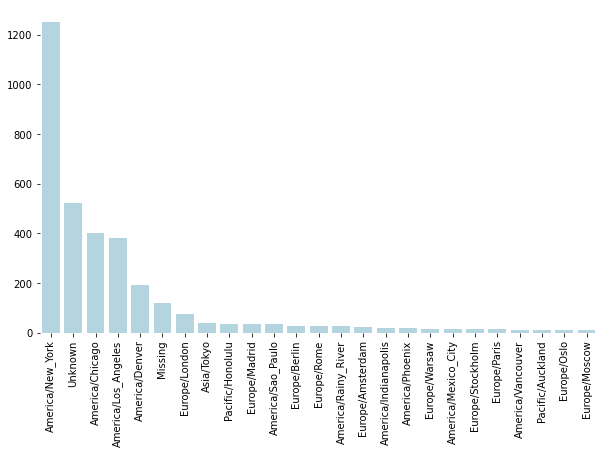

In [846]:
# Setting global parameters
plt.rc('figure', figsize=(10,6))

tz2 = df.tz.fillna('Missing')
tz2[tz2 == ''] = 'Unknown'
counts = tz2.value_counts()[:25]
sns.barplot(x=counts.index,
            y=counts.values,
            color='lightblue'
           )

plt.xticks(rotation=90)
for spine in plt.axes().spines:
    plt.axes().spines[spine].set_visible(False)

In [242]:
# Top operating system
# Make Series of os's
agents = pd.Series([x.split()[0] for x in df.a.dropna()])
agents.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [413]:
# Group by 'os' and timezoe
df2 = df[df.a.notnull()] # Remember this is how to filter on values in a column
df2['os'] = np.where(df2.a.str.contains('Windows'),
                    'Windows', 'Not Windows') 

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Not Windows


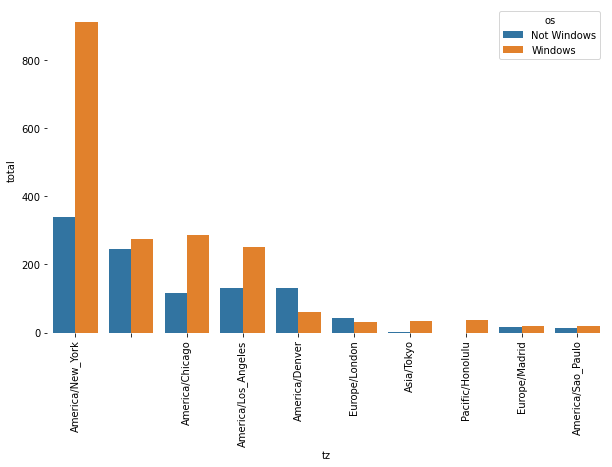

In [412]:
by_os = df2.groupby(['tz', 'os']).size()
by_os = by_os.unstack().fillna(0)# sum by timezoe level
top_10 = by_os.sum(1).nlargest(10).index
top_by_os = by_os.loc[top_10].stack()
top_by_os.name = 'total'
top_by_os = top_by_os.reset_index()

sns.barplot(data=top_by_os, x='tz', y='total', hue='os')
plt.xticks(rotation=90)
for spine in plt.axes().spines:
    plt.axes().spines[spine].set_visible(False)

# indexer = tz_sums.sum(1).sort_values().argsort() # Need to figure out what wrong here
# res = tz_sums.take(indexer[-10:]).stack().reset_index()
# res.rename({0:'total'}, axis=1, inplace=True)
# # # ^ don't have to do this crap can just use pandas nlargest method
# # tz_sums.sum(1).nlargest(10)

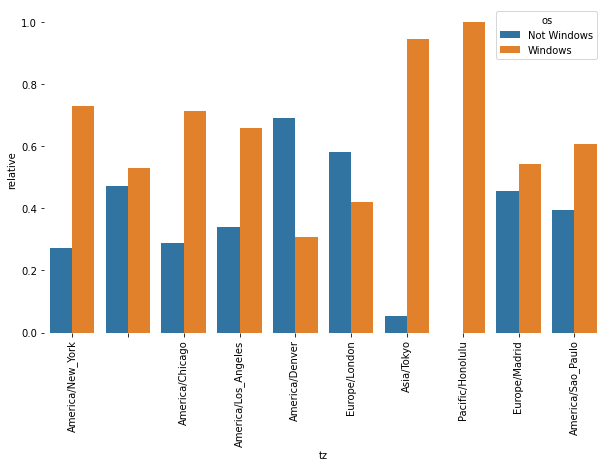

In [429]:
# Normalize the values to sum of timezoe to see relative percentages
g = top_by_os.groupby('tz')
top_by_os['relative'] = top_by_os.total / g.total.transform('sum')
sns.barplot(data=top_by_os, x='tz', y='relative', hue='os')
plt.xticks(rotation=90)
for spine in plt.axes().spines:
    plt.axes().spines[spine].set_visible(False)

## 14.2 MovieLens 1M Dataset

In [452]:
pd.options.display.max_rows = 20

In [449]:
# Make display smaller

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/users.dat',
                      sep='::',
                      header=None, # Need to specify bc data has no column headers
                     names=unames
                      ) 

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ratings.dat',
                       sep='::',
                       header=None,
                       names=rnames
                       )

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movies.dat',
                      sep='::',
                      header=None,
                      names=mnames
                      )


In [454]:
db = pd.merge(pd.merge(users, ratings), movies) # nested merge :fire:
db

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [716]:
num_rat = db.groupby('title').size()
num_rat.name = 'size'
num_rat = num_rat.to_frame().reset_index()
avg_rat = db.groupby('title')['title', 'rating'].mean('rating').reset_index() # Notice how to select columns on grby
pd.merge(avg_rat, num_rat).sort_values('rating')[-20:]

,title,rating,size
2901,Schindler's List (1993),4.510417,2304
3504,"Usual Suspects, The (1995)",4.517106,1783
713,"Close Shave, A (1995)",4.520548,657
1354,"Godfather, The (1972)",4.524966,2223
2970,"Shawshank Redemption, The (1994)",4.554558,2227
2940,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510,628
2883,Sanjuro (1962),4.608696,69
199,"Apple, The (Sib) (1998)",4.666667,9
1870,Lamerica (1994),4.750000,8
1622,I Am Cuba (Soy Cuba/Ya Kuba) (1964),4.800000,5


In [701]:
# Use pivot table to get the mean by gender
genre_ratings = db.pivot_table('rating', index='genres',
              columns='gender', aggfunc='mean').sort_values(by='F')
genre_ratings

gender,F,M
genres,,
Comedy|Film-Noir|Thriller,1.000000,2.250000
Action|Adventure|Children's,1.250000,1.325000
Action|Adventure|Children's|Fantasy,1.857143,2.135135
Action|Children's,1.861538,1.708696
Action|Adventure|Children's|Sci-Fi,2.163636,1.820339
...,...,...
Sci-Fi|War,4.376623,4.464789
Film-Noir|Romance|Thriller,4.448718,4.211073
Animation,4.533333,4.353107


In [841]:
# Make is of title with more than 250 rating
genre_by_size = db.groupby('genres').size()
active_genres = genre_by_size[genre_by_size >= 250]

([], [])

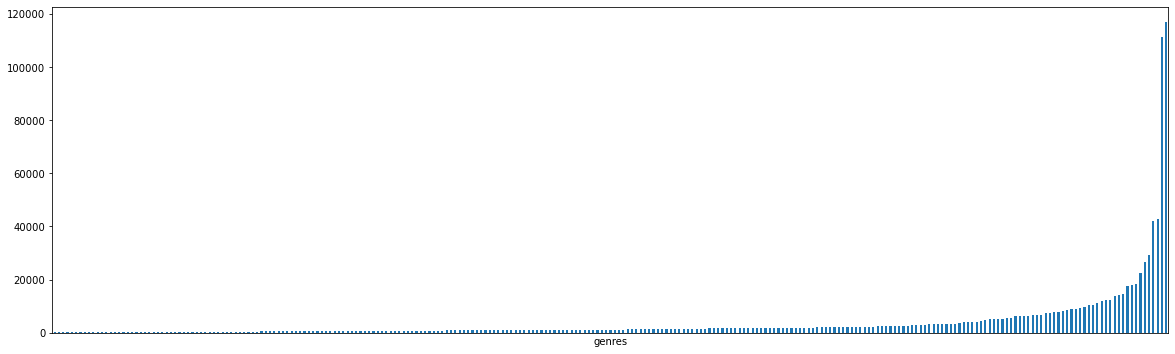

In [842]:
active_genres.sort_values().plot(kind='bar', figsize=(20,6))
plt.xticks([])

In [704]:
# Filter by genres with more than 250 ratings
active_genres = active_genres.index
genre_ratings = genre_ratings.loc[active_genres]

In [712]:
# Measureing the difference between male and female
genre_ratings['dif'] = genre_ratings['F'] - genre_ratings['M']
genre_ratings.sort_values(by='dif')

gender,F,M,dif
genres,,,
Action|Adventure|Comedy|Horror,3.297297,3.909283,-0.611985
Action|Western,3.541667,4.144167,-0.602500
Action|Comedy|Crime|Horror|Thriller,2.735714,3.232558,-0.496844
Adventure|Animation|Sci-Fi|Thriller,3.511111,3.980344,-0.469233
Action|Comedy|War,2.873016,3.291971,-0.418955
...,...,...,...
Musical|Romance|War,3.887850,3.445087,0.442764
Adventure|Children's|Comedy,3.046083,2.567901,0.478182
Comedy|Horror|Musical|Sci-Fi,3.673016,3.160131,0.512885


In [722]:
# By most disagreement
genre_std = db.groupby('genres')['rating'].std()
genre_std = genre_std.loc[active_genres]
genre_std.sort_values()[-20:]

genres
Fantasy|Sci-Fi                  1.183067
Action|Comedy|Sci-Fi|War        1.185632
Action|War                      1.191213
Horror|Sci-Fi                   1.195728
Action|Adventure|Sci-Fi|War     1.203245
Children's                      1.207422
Adventure|Children's|Sci-Fi     1.211616
Comedy|Horror|Thriller          1.212956
Action|Comedy|Fantasy           1.218889
Comedy|Crime|Horror             1.222715
Action|Adventure|Drama          1.223888
Horror|Mystery|Thriller         1.226117
Comedy|Musical|Romance          1.227628
Sci-Fi                          1.239424
Comedy|Drama|Sci-Fi             1.245533
Horror|Thriller                 1.248948
Action|Horror                   1.250906
Comedy|Horror|Musical|Sci-Fi    1.260177
Horror                          1.275224
Action|Comedy|Musical|Sci-Fi    1.277695
Name: rating, dtype: float64

## 14.3 US Baby Names 1880-2010

In [724]:
!head data/names/yob1880.txt

In [805]:
years = range(1880, 2022)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    df = pd.read_csv(f'data/names/yob{year}.txt',names=columns)
    df['year'] = year
    pieces.append(df)

names = pd.concat(pieces, ignore_index=True)


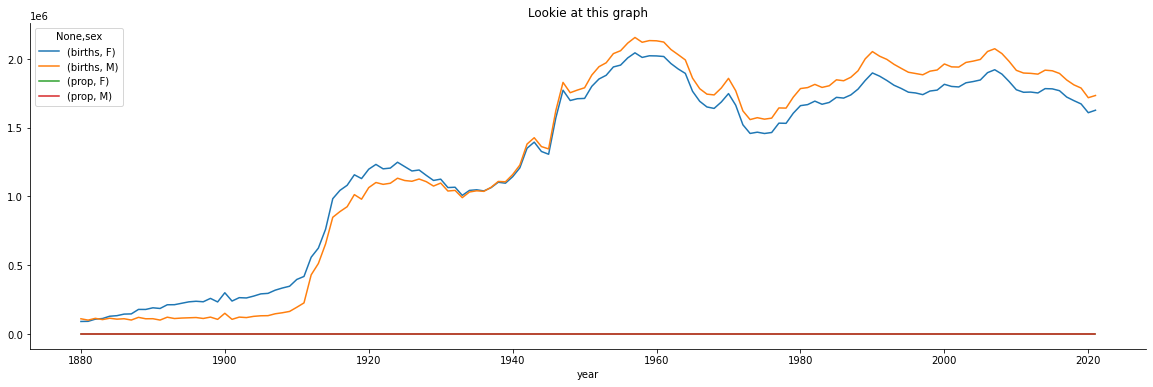

In [838]:
fm_totals = names.groupby(['year', 'sex']).sum().unstack(1)
fm_totals.plot(title='Lookie at this graph', figsize=(20,6))
plt.axes().spines['top'].set_visible(False)
plt.axes().spines['right'].set_visible(False)

In [808]:
# Add propotion column
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [809]:
plt.rc('figure', figsize=(10,6))
all_sums = names.groupby('name')[['births']].sum('births').sort_values('births')[-20:]#.plot(kind='bar')

,births
name,
Linda,1457512
Anthony,1469628
Jennifer,1474216
George,1486086
Patricia,1577758
Matthew,1631157
Elizabeth,1666227
Daniel,1956580
Christopher,2058380


In [857]:
def get_largest(group, n=1000, columns='births'):
    return group.nlargest(n, columns)
top1000 = names.groupby(['year', 'sex']).apply(get_largest)

top1000.reset_index(inplace=True, drop=True) # Get rid of duplicated stuff
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Atharv,M,217,2021,0.000125
283873,Bishop,M,217,2021,0.000125
283874,Blaise,M,217,2021,0.000125


In [858]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
282871,Aarya,F,255,2021,0.000157
282872,Eleanora,F,255,2021,0.000157
282873,Sandra,F,255,2021,0.000157
282874,Soleil,F,255,2021,0.000157


<AxesSubplot:xlabel='year'>

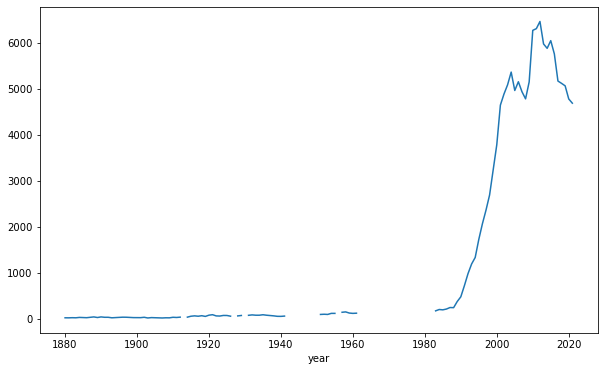

In [866]:
total_births = top1000.pivot_table('births',
                                   index='year',
                                   columns='name',
                                   aggfunc=sum
                                  )

total_births['Zoe'].plot()

In [882]:
names_p = names.pivot_table('births',
                                   index='year',
                                   columns='name',
                                   aggfunc=sum
                                  )

<function matplotlib.pyplot.axes(arg=None, **kwargs)>

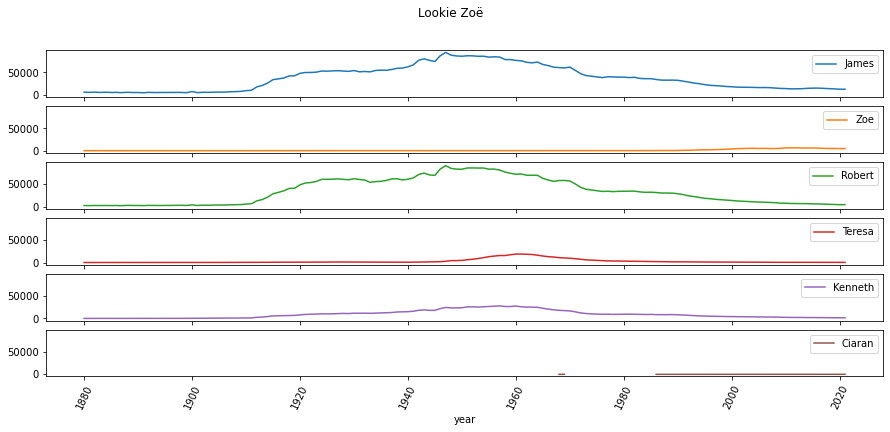

In [944]:
subnames = ['James', "Zoe", "Robert", "Teresa", "Kenneth", "Ciaran"]
names_p[subnames].plot(
    grid=False,
    subplots=True,
    sharex = True,
    sharey = True,
    figsize=(15, 6),
    sort_columns=True,
    rot=65,
    title='Lookie Zoë'
)

# for spine in plt.axes().spines:
#     plt.axes().spines[spine].set_visible(False)

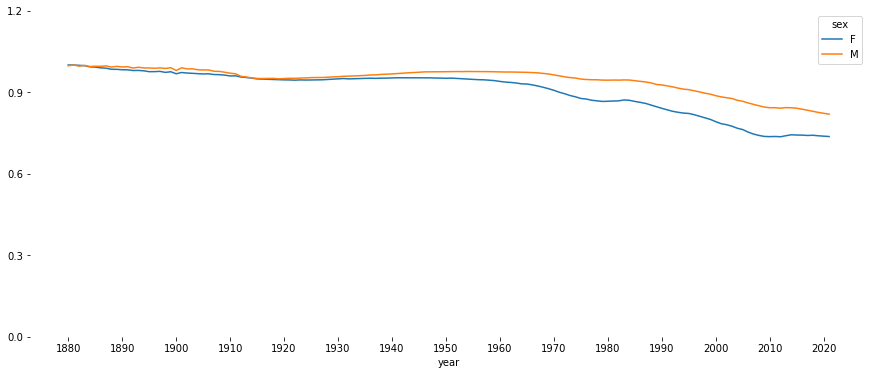

In [967]:
# How top100 compare a % of total
table = top1000.pivot_table('prop',
                    index='year',
                    columns='sex',
                    aggfunc=sum
                   )                    

table.plot( 
    yticks=np.linspace(0, 1.2, 5), # Range cant handle decimals
    xticks=range(1880, 2021, 10),
    figsize=(15,6)
)

for spine in plt.axes().spines:
    plt.axes().spines[spine].set_visible(False)

In [980]:
# Getting number of names that sum to 50% to measure diversity
df = boys[boys.year == 1992]
test = df.sort_values(by='prop', ascending=False).prop.cumsum()
# searchsorted function return to 0-indexed position where inserting the value would keep order
test.values.searchsorted(0.5) + 1

51

<AxesSubplot:title={'center':'Number of popular names in top %50'}, xlabel='year'>

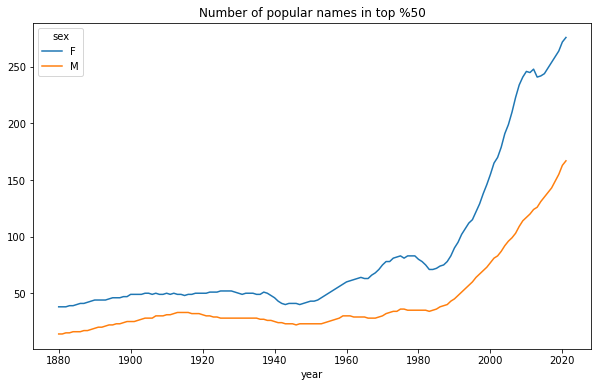

In [986]:
# Write function to to this
def get_quant_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False).prop.cumsum()
    return group.values.searchsorted(q) + 1

diversity = names.groupby(['year', 'sex']).apply(get_quant_count).unstack('sex')

diversity.plot(
title='Number of popular names in top %50'
)

In [998]:
# See counts of last letters
get_last_letter = lambda x: x[-1]
# %timeit names.name.apply(get_last_letter) # apply and map take same amount of time
# %timeit names.name.map(get_last_letter) 
last_letter = names.name.apply(get_last_letter)

In [1015]:
table = names.pivot_table('births', index=last_letter,
                         columns=['sex', 'year'], aggfunc=sum)
# Select three representive years with reindex
subtable = table.reindex(columns=[1880, 1960, 2020], level=1)

<AxesSubplot:title={'center':'Male'}, xlabel='name'>

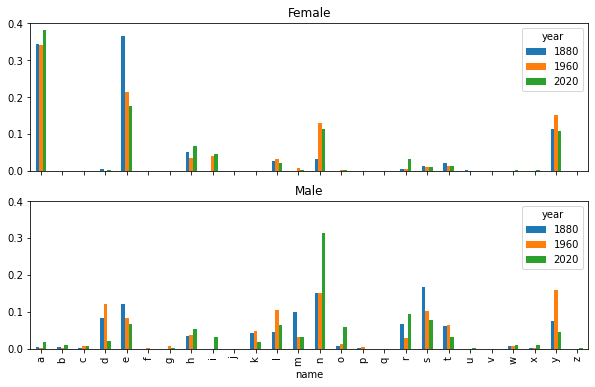

In [1029]:
# Easily create a new table
letter_prop = subtable / subtable.sum()
letter_prop
fig, axes = plt.subplots(2, 1, figsize=(10,6),
                         sharex=True,
                         sharey=True) # how you can specify the pannel in a subplot
letter_prop['F'].plot(kind='bar', ax=axes[0], title='Female')
letter_prop['M'].plot(kind='bar', ax=axes[1], title='Male')


<AxesSubplot:xlabel='year'>

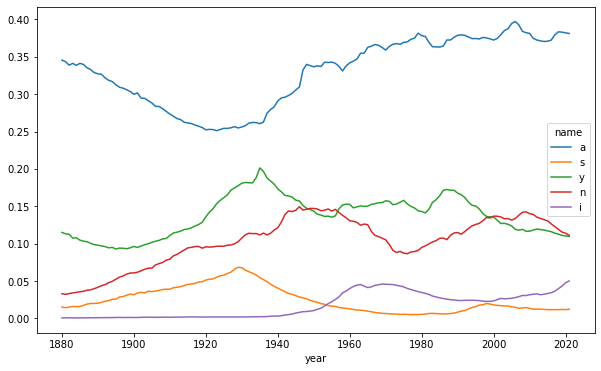

In [1054]:
# Making time series for paricular letters for particular gender


t2 = (table / table.sum()).loc[list('asyni'), 'F'].T
t2.plot()

In [1074]:
# See lesie
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lessies = top1000[top1000.name.isin(lesley_like)]

<AxesSubplot:xlabel='year'>

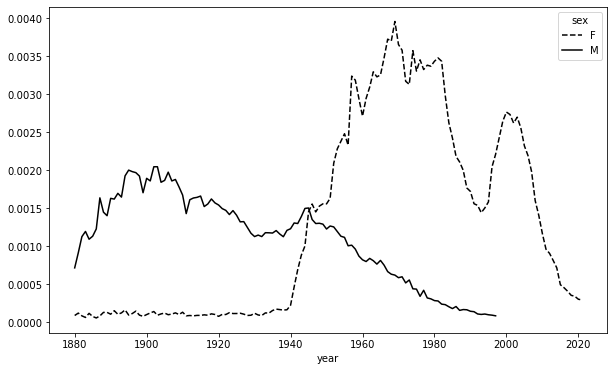

In [1081]:
(lessies.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
        .plot(style={'M': 'k-', 'F': 'k--'}))

## 14.4 USDA Food Database

In [1091]:
# !curl 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/usda_food/database.json' > data/fooddb.json
db = json.load(open('data/fooddb.json'))

In [1097]:
print(db[0].keys())
for n in db[0]['nutrients']:
    print(n)

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])
{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}
{'value': 29.2, 'units': 'g', 'description': 'Total lipid (fat)', 'group': 'Composition'}
{'value': 3.06, 'units': 'g', 'description': 'Carbohydrate, by difference', 'group': 'Composition'}
{'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'}
{'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'}
{'value': 39.28, 'units': 'g', 'description': 'Water', 'group': 'Composition'}
{'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'}
{'value': 0.0, 'units': 'g', 'description': 'Fiber, total dietary', 'group': 'Composition'}
{'value': 673.0, 'units': 'mg', 'description': 'Calcium, Ca', 'group': 'Elements'}
{'value': 0.64, 'units': 'mg', 'description': 'Iron, Fe', 'group': 'Elements'}
{'value': 22.0, 'units': 'mg', 'description': 'Magnesium, Mg', 'group': 'Element

In [1115]:
# Make a metadata dict from db
columns= ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=columns).rename(columns = {'description' : 'food',
                                                'group' : 'fgroup'}, copy=False)
print(info.value_counts(info.fgroup)

fgroup
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
                                    ... 
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs                      41
Length: 25, dtype: int64


In [1124]:
# Covert nutrients into new table
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index=True).rename(columns={'description' : 'nutrient',
                                                                   'group' : 'nutgroup'})


In [1125]:
# Get rid of dulicates
nutrients.duplicated().sum() # how many are duplicated
nutrients = nutrients.drop_duplicates()
len(nutrients)

375176

In [1130]:
# join the two table with outer
ndata = pd.merge(nutrients, info, how='outer')

In [1147]:
result = ndata.groupby(['nutrient' ,'fgroup'])['value'].quantile(0.5)

<AxesSubplot:xlabel='fgroup'>

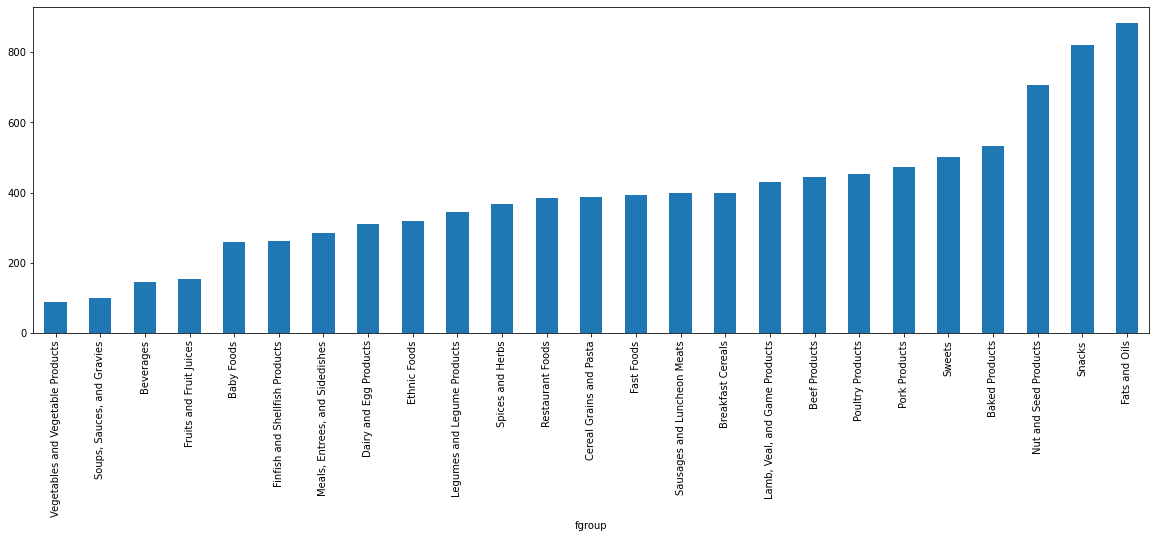

In [1153]:
result['Energy'].sort_values().plot(kind='bar', figsize=(20,6))

In [1156]:
# Finding which gorup is most dense in each nutrient
get_max = lambda x: x.loc[x.value.idxmax()]
get_min = lambda x: x.loc[x.value.idxmin()]
by_nutrient = ndata.groupby(['nutgroup', 'nutrient']).apply(get_max)

In [1158]:
by_nutrient.to_csv('best_nut_by_group.csv')

## 2012 Federal Election Commission Database

In [1163]:
# path = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/fec/P00000001-ALL.csv'
# fec = pd.read_html(path)[0] 
# ^ took too long
fec = pd.read_csv('data/fec.csv')

In [1196]:
# Create parties column
unique_cans = fec.cand_nm.unique()
rebubs = [can for can in unique_cans if 'Barack' not in can]

parties = dict(zip(rebubs, ['Rep'] * len(rebubs)))
parties['Obama, Barack'] = 'Dem'
fec['party'] = fec.cand_nm.map(parties)

In [1209]:
# Remove refunds, keep only barack, mit
fec = fec[fec['contb_receipt_amt'] > 0 ]
fec_fil = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

(694282, 17)

<AxesSubplot:ylabel='contbr_occupation'>

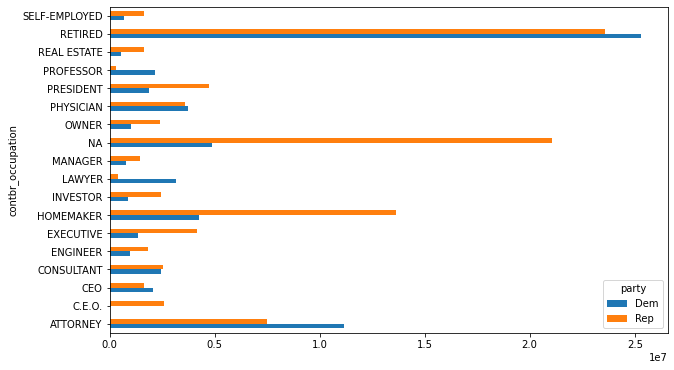

In [1268]:
# Clean up occ names
occ_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS" : "NA",
    "INFORMATION REQUESTED" : "NA",
    "INFORMATION REQUESTED (BEST EFFORTS)" : "NA",
    "NONE" : "NA"
}
f = lambda x: occ_mapping.get(x, x) # Use get() to return x if no match for x
fec.contbr_occupation = fec.contbr_occupation.map(f)

by_occ = fec.pivot_table('contb_receipt_amt',
                index='contbr_occupation',
                columns='party',
                aggfunc='sum')

# Filter for over 2000000
by_occ_fil = by_occ[by_occ.sum(1) > 2000000]
by_occ_fil.plot(kind='barh')

In [1280]:
# cannidate occupations

def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

g = fec_fil.groupby('cand_nm')
g.apply(get_top_amounts, 'contbr_occupation')

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
Name: contb_receipt_amt, dtype: float64

<AxesSubplot:xlabel='contb_receipt_amt'>

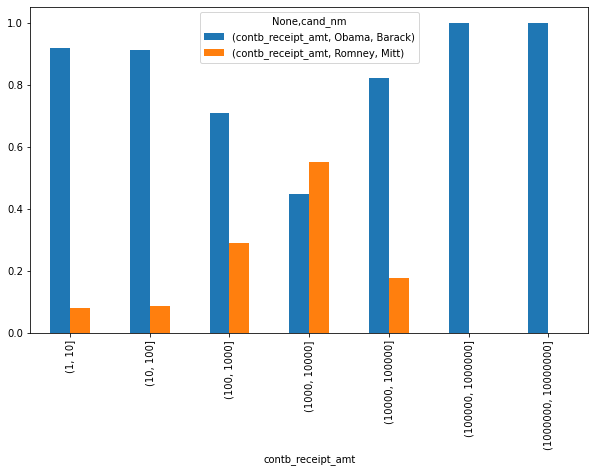

In [1299]:
# Bin data by contribution amount
bins = np.array([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_fil.contb_receipt_amt, bins)
g = fec_fil.groupby(['cand_nm', labels]).sum()
total = g.drop('file_num', axis=1).unstack(0)
total.div(total.sum(axis=1), axis=0).plot(kind='bar') # this is how to get %

In [1307]:
# Donations by state
gor(fec_fil.groupby(['cand_nm', 'contbr_st']).contb_receipt_amt.sum(1).unstack(0))

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,NaN
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84
